<a href="https://colab.research.google.com/github/antuness/Deep_Learning_with_Pytorch/blob/main/Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/

https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

# **Carregando os dados**

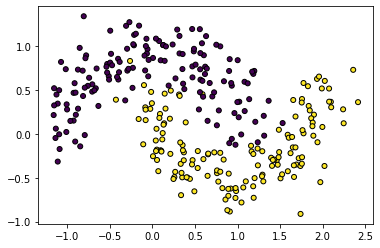

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:,0], X1[:, 1], marker='o',
            c=Y1, s=25, edgecolor='k')

# **nn.Sequential**

In [52]:
import torch
from torch import nn #neural networks

input_size = 2
hidden_size = 16 # é decidido pelo programador, quanto mais parâmetro, mais complexa é sua rede pois entende mais
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), #hidden (escondida)
                    nn.ReLU(), # ativação não linear 
                    nn.Linear(in_features=hidden_size, out_features=output_size)) #output (saída)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)


# **Summary**

 O módulo summary da biblioteca torchsummary nos permite visualizar mais informações sobre a nossa rede, como quantidade de parâmetros e o tamanho que cada elemento ocupa na memória

In [39]:
from torchsummary import summary
summary(net, input_size=(1,input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 16]              48
              ReLU-2                [-1, 1, 16]               0
            Linear-3                 [-1, 1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# **Forward**

In [40]:
print(X1.dtype)

float64


In [41]:
print(X1.shape)

(300, 2)


In [42]:
tensor = torch.from_numpy(X1).float() # precisa passar para o 32
pred = net(tensor)
print(pred.size())

torch.Size([300, 1])


In [ ]:
## para 300 dados com 2 dimensões
## eu tenho um perceptron de 300 predições

# **Classe nn.Module**

*   _init()_: definição de hiperparâmetro e instância do modelo
*   forward(): Fluxo da entrada para produzir uma saída





In [4]:
import torch
from torch import nn

class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    
    #Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):

      # Gerar uma saída a partir do X
      hidden = self.relu(self.hidden(X))
      output = self.output(hidden)

      return output

# **Instanciando a rede**

In [54]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


# **Forward**

In [55]:
print(X1.shape)

(300, 2)


In [56]:
tensor = torch.from_numpy(X1).float()

In [58]:
print(pred.size())

torch.Size([300, 1])


# **GUP**

In [5]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


In [6]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [12]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
print(tensor)

(300, 2)
tensor([[ 2.0267,  0.6064],
        [ 0.6173,  0.6845],
        [ 1.9353,  0.6293],
        [ 2.2421,  0.2820],
        [ 1.7767,  0.0079],
        [ 0.0513, -0.1782],
        [-0.0862,  0.7258],
        [ 1.2915, -0.1964],
        [ 2.0230, -0.3648],
        [-0.4013,  0.6221],
        [-0.2640,  0.8343],
        [ 1.0207,  0.3689],
        [-0.0585,  0.9688],
        [-0.9088, -0.0858],
        [ 1.0826,  0.5964],
        [-0.0843,  0.3047],
        [ 0.2577, -0.4916],
        [ 0.1241,  1.0156],
        [ 1.2939, -0.4639],
        [ 1.2398, -0.3574],
        [ 1.8992,  0.2212],
        [-0.1624,  0.1713],
        [ 0.5643,  0.6206],
        [ 0.4691,  0.7720],
        [ 0.7039,  0.4287],
        [ 0.9082,  0.8548],
        [-0.3103,  1.2354],
        [-0.5325,  0.7996],
        [-1.1290,  0.4509],
        [-1.0043,  0.2803],
        [ 1.3138, -0.0186],
        [ 1.2884, -0.4819],
        [ 1.8372,  0.3206],
        [ 0.7745, -0.5427],
        [ 0.4668,  1.1988],
        [ 0